<a href="https://colab.research.google.com/github/marinba2200/DL_test/blob/main/Ex_Convolutional_Neural_Network_H5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CNN
CNN是沒有記憶性的(與時間無關)

基礎CNN使不使用GPU其實影響沒有很大

但是資料傳輸會影響處理時間，直接使用影像會傳輸很久

所已課程終使用h5資料格式會較快速

filter：透過不同類型的濾鏡可以使不同特徵浮現

padding：慮鏡會使影像縮小(可在周圍補0)、會弱化邊點

補釘大小=(濾鏡大小-1)/2 就可以保持相同的卷積

stride：步伐，若步伐無法整除則無條件捨去

((input+2*padding-filter)/stride)+1 =~N

convolution在數學上會使filter上下左右翻轉(2D時)(1D只會左右翻轉)，
但是影像中都沒有翻轉，都是像cross-correlation一樣正常去卷而已。

if input = (6,6,3) , filter = (3,3,3)

output = (4,4,1) ,
(channel會合併，每個output的pixel會等於 

sigma(1 to 27) : input(i)*filter(i))

if filter = 10*(3,3,3) , we will have 10(3x3x3+1(bias))=280 wieght.

filter的個數會取代最初的RGB三個channel，成為新的channel個數。

下一層大小 = (inpput層大小-filter大小)/2

通常進入越後面層數長寬會越縮越小，channel會越來越多，因為特徵會越抓越多。

最後執行pooling layer(每四個pixel一組取最大值)，p = 0，s = 2,f = 2，pooling時channel不會變，長寬砍半。

最後會轉為Dense(拉平狀的資料(ex:(120,1))),然後越縮越小再塞進softmax中，output出ex:(10,1)的結果。

In [ ]:
from google.colab import drive #執行這個後點網址可以登入google，登入後會顯示authorization code，再輸入到下面框框
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os #連上雲端硬碟

os.chdir("/content/drive/My Drive/Colab Notebooks/dataset") #可自行在Colab Notebooks後方更改路徑
os.getcwd() #查看當前路徑

'/content/drive/My Drive/Colab Notebooks/dataset'

## Building CNN

In [ ]:
import tensorflow as tf

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(32, (3, 3),input_shape = (64,64,3),activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(32, (3, 3),activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Generator Data

In [ ]:
import numpy as np
import h5py

def load_h5py_to_np(path, key1, key2):
    h5_file = h5py.File(path, 'r')
    print(h5_file.keys())
    permutation = np.random.permutation(len(h5_file[key2]))
    shuffled_image = h5_file[key1][:][permutation, :, :, :]
    shuffled_label = h5_file[key2][:][permutation]
    # print('亂數後的標籤為':\n', shuffled_label, len(h5_file['y_train']))
    return shuffled_image, shuffled_label
 
 
X_train, y_train = load_h5py_to_np('train_set.h5', 'X_train', 'y_train')
print(X_train.shape)
print(y_train.shape)

X_test, y_test = load_h5py_to_np('test_set.h5', 'X_test', 'y_test')
print(X_test.shape)
print(y_test.shape)

<KeysViewHDF5 ['X_train', 'y_train']>
(8000, 64, 64, 3)
(8000, 1)
<KeysViewHDF5 ['X_test', 'y_test']>
(2000, 64, 64, 3)
(2000, 1)


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
#通常會在train上做比較多設定，test則否。此函式可以產生多個也可以自由選擇影像大小等(重塑等等)。
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
print(train_datagen)
print(test_datagen)

In [ ]:
training_set = train_datagen.flow(X_train, y=y_train, batch_size = 32)
#此為generator產生出得dataset
test_set = test_datagen.flow(X_test, y=y_test, batch_size = 32)
print(training_set)
print(test_set)

In [ ]:
import time
tic = time.time()
#step_per_epoch某些版本會限制必須=所有資料量/batch_size
cnn.fit(training_set, steps_per_epoch=250, epochs=20, validation_data=test_set, validation_steps=62)
toc = time.time()

print(str(1000*(toc-tic)) + "ms")

Epoch 1/20
250/250 [==============================] - 9s 36ms/step - loss: 0.6652 - accuracy: 0.5955 - val_loss: 0.6063 - val_accuracy: 0.6951
Epoch 2/20
250/250 [==============================] - 9s 36ms/step - loss: 0.5923 - accuracy: 0.6817 - val_loss: 0.5992 - val_accuracy: 0.6754
Epoch 3/20
250/250 [==============================] - 9s 36ms/step - loss: 0.5560 - accuracy: 0.7181 - val_loss: 0.5406 - val_accuracy: 0.7394
Epoch 4/20
250/250 [==============================] - 9s 36ms/step - loss: 0.5207 - accuracy: 0.7414 - val_loss: 0.5363 - val_accuracy: 0.7324
Epoch 5/20
250/250 [==============================] - 9s 36ms/step - loss: 0.5160 - accuracy: 0.7390 - val_loss: 0.4965 - val_accuracy: 0.7681
Epoch 6/20
250/250 [==============================] - 9s 36ms/step - loss: 0.4818 - accuracy: 0.7664 - val_loss: 0.5254 - val_accuracy: 0.7601
Epoch 7/20
250/250 [==============================] - 9s 36ms/step - loss: 0.4669 - accuracy: 0.7747 - val_loss: 0.4861 - val_accuracy: 0.7727

About 3 mins

In [ ]:
#cnn.save('CNN_H5_Opt1_h5',save_format = 'h5') #儲存model的指令

In [ ]:
#new_model = tf.keras.models.load_model('CNN_H5_Opt1_h5') #匯入model的指令(這裡是用老師訓練好的)
#new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

## Prodiction

dog


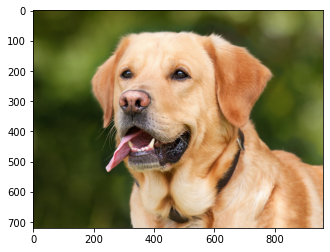

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(tf.keras.preprocessing.image.load_img('cat_or_dog_1.jpg'))
test_image = tf.keras.preprocessing.image.load_img('cat_or_dog_1.jpg', target_size = (64, 64))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1